In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_diabetes

data = load_diabetes()

In [4]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [7]:
X = data.data
y = data.target

In [8]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [9]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [11]:
lr.fit(X_train,y_train)

LinearRegression()

In [12]:
print(lr.coef_)
print(lr.intercept_)

[  37.90031426 -241.96624835  542.42575342  347.70830529 -931.46126093
  518.04405547  163.40353476  275.31003837  736.18909839   48.67112488]
151.3456553477407


In [14]:
y_pred = lr.predict(X_test)

In [16]:
from sklearn.metrics import r2_score,mean_squared_error

print("R2 score:",r2_score(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score: 0.452606602161738
RMSE: 53.8532569849144


In [87]:
from sklearn.linear_model import Ridge

r = Ridge(alpha=0.296)

In [88]:
r.fit(X_train,y_train)

Ridge(alpha=0.296)

In [89]:
print(r.coef_)
print(r.intercept_)

[  44.62318849 -157.04674462  430.73914105  278.32125966  -49.81547161
  -78.82023905 -186.48499389  138.64535914  328.27047413  103.61094147]
151.70227378964384


In [90]:
y_pred1 = r.predict(X_test)

In [93]:
print("R2 Score:",r2_score(y_test,y_pred1))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred1)))

R2 Score: 0.4587582212502591
RMSE: 53.54979996650945


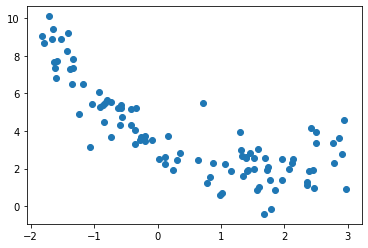

In [94]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

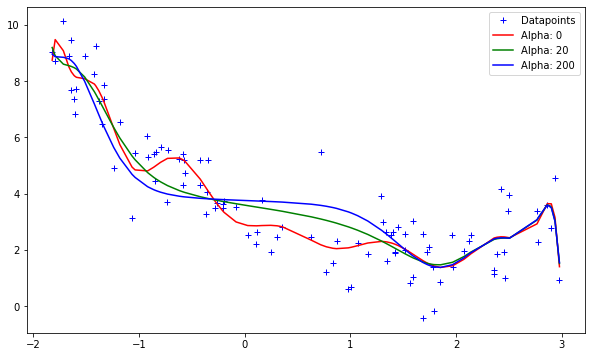

In [95]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()

## Ridge regression using Gradient descent

In [97]:
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split



In [98]:
X,y = load_diabetes(return_X_y=True)

In [100]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [101]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [105]:
from sklearn.linear_model import SGDRegressor

In [106]:
sreg = SGDRegressor(penalty='l2',max_iter=500,eta0=0.01,learning_rate='constant',alpha=0.001)

In [107]:
sreg.fit(X_train,y_train)

SGDRegressor(alpha=0.001, learning_rate='constant', max_iter=500)

In [109]:
y_pred2 = sreg.predict(X_test)

In [111]:
print("R2 score:",r2_score(y_test,y_pred2))
print(sreg.coef_)
print(sreg.intercept_)

R2 score: 0.4465249347472734
[  50.54336375 -102.8565673   360.1744444   244.71551549  -11.80889453
  -48.61706047 -175.08430436  136.85503974  279.28946751  133.52583026]
[151.50621825]


In [ ]:
from sklearn.linear_model import Ridge

regs = Ridge(alpha=0.001,max_iter=500,solver='sparse_cg') # slover: ‘sparse_cg’, ‘sag’, ‘saga’, ‘lbfgs’ (using sgd)

In [113]:
regs.fit(X_train,y_train)

Ridge(alpha=0.001, max_iter=500, solver='sparse_cg')

In [114]:
y_pred3 = regs.predict(X_test)

In [116]:
print("R2 score:",r2_score(y_test,y_pred3))
print(regs.coef_)
print(regs.intercept_)

R2 score: 0.4534314989787108
[  38.47998693 -241.35367882  543.83213906  346.78759444 -827.67602019
  437.15631152  116.9342775   260.75218975  696.11977482   49.74391773]
151.34202861628063
